In [1]:
import os
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
absolutePath = input('Enter the path location: ')
# Check if the OS path of the folder exists
try:
    X = np.empty((len(os.listdir(absolutePath)), 4096, 3))
    print('Folder path is correct!!!')
except Exception:
    print('Invalid folder path!!!')
    sys.exit(1)

Folder path is correct!!!


In [3]:
imgCount = 0
for fileName in os.listdir(absolutePath):  # read each image in the folder and store them into a numpy array
    imagePath = os.path.join(absolutePath, fileName)
    # Check if the OS path of the images are valid
    try:
        image = Image.open(imagePath)
    except Exception:
        print('Invalid image path!!!')
        sys.exit(1)
    image = np.array(image.resize((64, 64), Image.Resampling.BILINEAR), dtype=int)
    X[imgCount] = image.reshape((4096, 3))
    imgCount += 1
# Split image array into its R, G, and B components
X0 = X[:, :, 0]  # red
X1 = X[:, :, 1]  # green
X2 = X[:, :, 2]  # blue

In [4]:
class PCA:
    def __init__(self):
        self.numPC = None
        self.eigenValues = None
        self.eigenVectors = None

    def getEigen(self, X):
        # Get the sorted (descending order) eigenvalues and eigenvectors from a feature array
        normalized = X - X.mean(axis=0, keepdims=True)  # subtract the mean
        covariance = np.cov(normalized, rowvar=False)  # find covariance matrix
        self.eigenValues, self.eigenVectors = np.linalg.eig(covariance)  # find eigenvalues and eigenvectors of the covariance matrix
        eigenIndices = np.argsort(-self.eigenValues)  # find the order of the sorted eigenvalues with their indices
        self.eigenVectors = self.eigenVectors.T  # get the transpose of eigenvectors
        self.eigenValues = self.eigenValues[eigenIndices]  # sort the eigenvalues in descending order
        self.eigenVectors = self.eigenVectors[eigenIndices]  # sort the eigenvectors according to eigenvalues

    def getkLargestPCs(self, k):
        # Get the first k largest eigenvalues and their eigenvectors
        self.numPC = k
        largestEigenValues = self.eigenValues[:self.numPC]
        largestEigenVectors = self.eigenVectors[:self.numPC]
        return largestEigenValues, largestEigenVectors

    def getPVE(self, largestEigenValues):
        # Get the PVE of the principle components
        listPVE = []
        for e in largestEigenValues:
            listPVE.append(e / np.sum(self.eigenValues))
        return listPVE

    def getNormalizedPCs(self, largestEigenVectors):
        # Get the normalized version of the principal components
        X_PCs = np.reshape(largestEigenVectors, (self.numPC, 64, 64))
        normalizedX_PCs = (X_PCs - X_PCs.min()) / (X_PCs.max() - X_PCs.min())
        return normalizedX_PCs

In [5]:
def plotPVE(listPVE, colorName):
    # Plot the PVE vs PC graph
    title = 'PVE vs. Principal Component for ' + colorName
    plt.title(title)
    plt.xlabel('Principal Component')
    plt.ylabel('Portion of Variance Explained')
    x = np.arange(1, len(listPVE)+1, 1)
    plt.plot(x, listPVE, marker='o')
    plt.show()

In [6]:
def getKmin(pca):
    # Find the minimum number of PCs that are required to obtain at least 70% PVE
    k = 1
    sumPVE = 0
    while sumPVE < 0.70:
        eigenValuesL, eigenVectorsL = pca.getkLargestPCs(k)
        listPVE = pca.getPVE(eigenValuesL)
        sumPVE = np.sum(listPVE)
        k += 1
    return k

In [7]:
pca_X0 = PCA()  # PCA for red
pca_X1 = PCA()  # PCA for green
pca_X2 = PCA()  # PCA for blue

PVEs of the first 10 PCs for red:  [0.2150681068731376, 0.13542095903812387, 0.07504082393012268, 0.05172646440945583, 0.042285900646601336, 0.024580425792268025, 0.021770322002457664, 0.01989656951031639, 0.017069749419479512, 0.01655849356363037]
Sum of the first 10 PCs for red:  0.6194178151855932


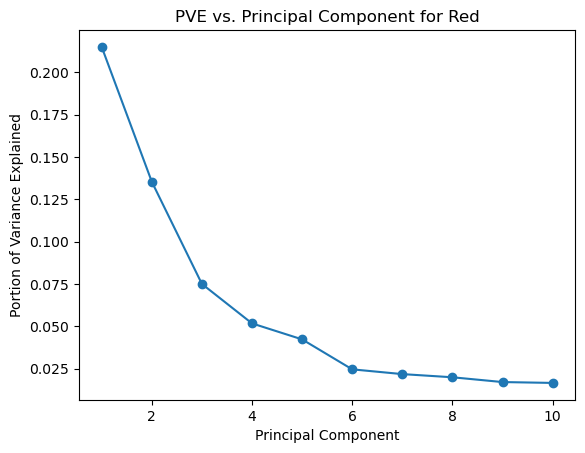

In [8]:
pca_X0.getEigen(X0)
eigenValuesL_X0, eigenVectorsL_X0 = pca_X0.getkLargestPCs(10)  # get first 10 eigenvalues and eigenvectors for red
listPVE_X0 = pca_X0.getPVE(eigenValuesL_X0)  # get the list of first 10 PVE for red
print('PVEs of the first 10 PCs for red: ', listPVE_X0)
print('Sum of the first 10 PCs for red: ', np.sum(listPVE_X0))
plotPVE(listPVE_X0, 'Red')

PVEs of the first 10 PCs for green:  [0.20045373100504213, 0.1376758814315232, 0.07695187885576904, 0.053969649951490825, 0.04291814352919716, 0.026021557702841355, 0.02142609389411918, 0.020812494401400036, 0.01739320386410746, 0.016811114431734355]
Sum of the first 10 PCs for green:  0.6144337490672248


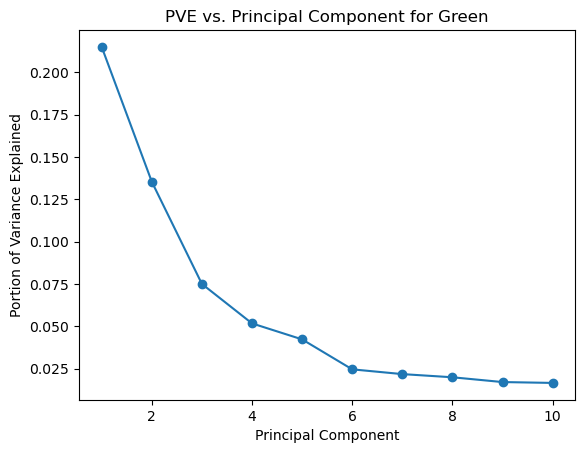

In [9]:
pca_X1.getEigen(X1)
eigenValuesL_X1, eigenVectorsL_X1 = pca_X1.getkLargestPCs(10)  # get 10 eigenvalues and eigenvectors for green
listPVE_X1 = pca_X1.getPVE(eigenValuesL_X1)  # get the list of first 10 PVE for green
print('PVEs of the first 10 PCs for green: ', listPVE_X1)
print('Sum of the first 10 PCs for green: ', np.sum(listPVE_X1))
plotPVE(listPVE_X0, 'Green')

PVEs of the first 10 PCs for blue:  [0.22994562131595436, 0.13677010354278882, 0.07033232471231898, 0.05355895002957549, 0.03981729858197311, 0.023730579789657077, 0.02098964613416302, 0.02075654086553709, 0.016680265709240957, 0.016291470910426934]
Sum of the first 10 PCs for blue:  0.6288728015916358


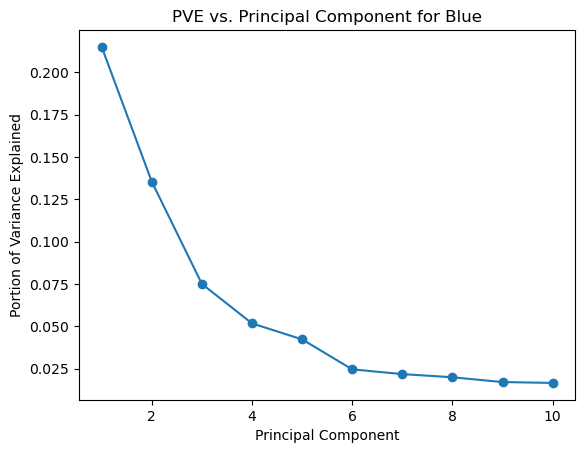

In [10]:
pca_X2.getEigen(X2)
eigenValuesL_X2, eigenVectorsL_X2 = pca_X2.getkLargestPCs(10)  # get 10 eigenvalues and eigenvectors for blue
listPVE_X2 = pca_X2.getPVE(eigenValuesL_X2)  # get the list of first 10 PVE for blue
print('PVEs of the first 10 PCs for blue: ', listPVE_X2)
print('Sum of the first 10 PCs for blue: ', np.sum(listPVE_X2))
plotPVE(listPVE_X0, 'Blue')

In [11]:
normalizedX0_PCs = pca_X0.getNormalizedPCs(eigenVectorsL_X0)
normalizedX1_PCs = pca_X1.getNormalizedPCs(eigenVectorsL_X1)
normalizedX2_PCs = pca_X2.getNormalizedPCs(eigenVectorsL_X2)
normalized_PCs = np.stack((normalizedX0_PCs, normalizedX1_PCs, normalizedX2_PCs), axis=3)

In [12]:
k_X0 = getKmin(pca_X0)
print('The minimum number of PCs that are required to obtain at least 70% PVE for red is', k_X0)
k_X1 = getKmin(pca_X1)
print('The minimum number of PCs that are required to obtain at least 70% PVE for green is', k_X1)
k_X2 = getKmin(pca_X2)
print('The minimum number of PCs that are required to obtain at least 70% PVE for blue is', k_X2)
print('The minimum number of PCs that are required to obtain at least 70% PVE for all channels is',
      max(k_X0, k_X1, k_X2))

The minimum number of PCs that are required to obtain at least 70% PVE for red is 19
The minimum number of PCs that are required to obtain at least 70% PVE for green is 20
The minimum number of PCs that are required to obtain at least 70% PVE for blue is 18
The minimum number of PCs that are required to obtain at least 70% PVE for all channels is 20


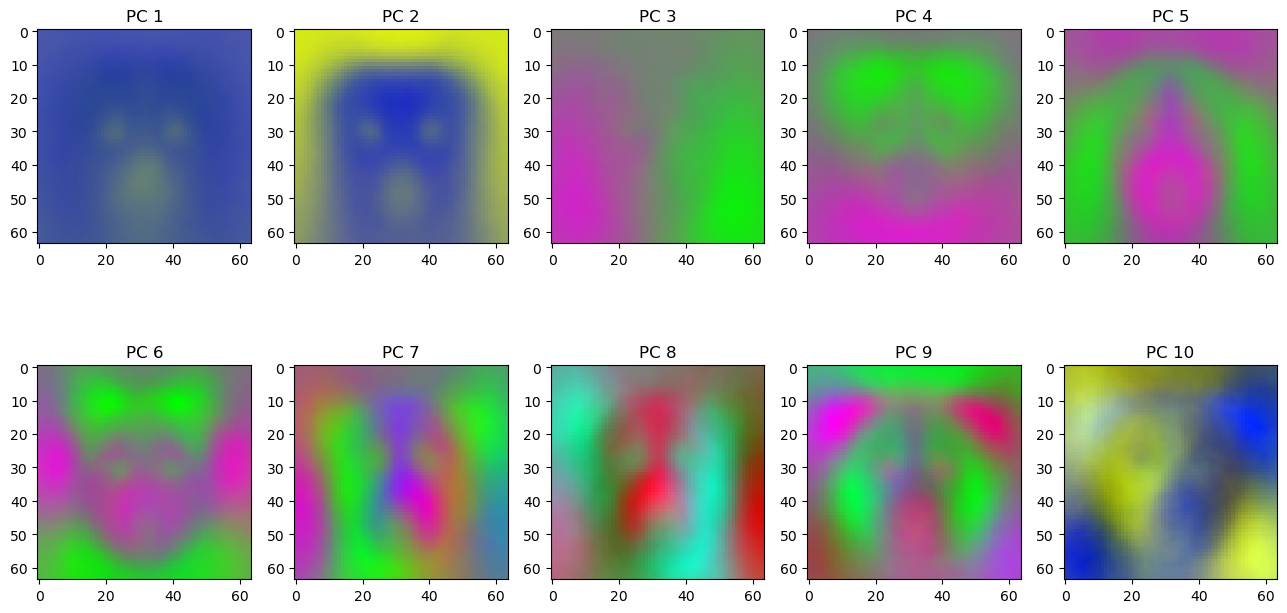

In [13]:
fig, axs = plt.subplots(2, 5, figsize=(16, 8))
for i in range(0, 5):
    axs[0, i].title.set_text('PC ' + str(i+1))
    axs[0, i].imshow(normalized_PCs[i])
for i in range(0, 5):
    axs[1, i].title.set_text('PC ' + str(i+6))
    axs[1, i].imshow(normalized_PCs[i + 5])
plt.show()

In [14]:
def perform(k, originalImg):
    # Reconstruct the original image with k principal components

    # Find k eigenvalues and eigenvectors for all channels
    eigenValuesL_X0, eigenVectorsL_X0 = pca_X0.getkLargestPCs(k)
    eigenValuesL_X1, eigenVectorsL_X1 = pca_X1.getkLargestPCs(k)
    eigenValuesL_X2, eigenVectorsL_X2 = pca_X2.getkLargestPCs(k)

    # Arrange original image for all channels
    originalImgX0 = originalImg[:, 0]
    originalImgX1 = originalImg[:, 1]
    originalImgX2 = originalImg[:, 2]

    nOriginalImgX0 = originalImgX0 - originalImgX0.mean(axis=0, keepdims=True)
    nOriginalImgX1 = originalImgX1 - originalImgX1.mean(axis=0, keepdims=True)
    nOriginalImgX2 = originalImgX2 - originalImgX2.mean(axis=0, keepdims=True)

    # Find reconstructed image for all channels
    dotProduct_X0 = (np.dot(np.dot(eigenVectorsL_X0, nOriginalImgX0), eigenVectorsL_X0)
                     + originalImgX0.mean(axis=0, keepdims=True)).reshape((64, 64))
    dotProduct_X1 = (np.dot(np.dot(eigenVectorsL_X1, nOriginalImgX1), eigenVectorsL_X1)
                     + originalImgX1.mean(axis=0, keepdims=True)).reshape((64, 64))
    dotProduct_X2 = (np.dot(np.dot(eigenVectorsL_X2, nOriginalImgX2), eigenVectorsL_X2)
                     + originalImgX2.mean(axis=0, keepdims=True)).reshape((64, 64))

    dotProduct = np.stack((dotProduct_X0, dotProduct_X1, dotProduct_X2), axis=2)
    return dotProduct

Image path is correct!!!


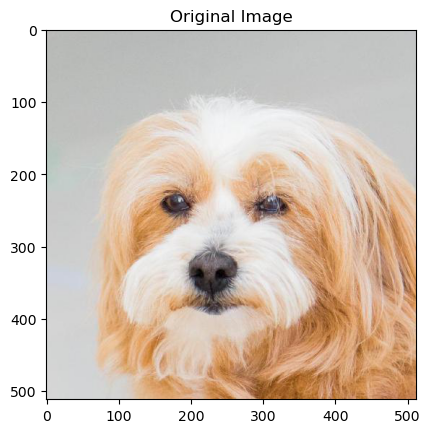

In [15]:
imgPath = input('Enter the path location of the image: ')
# Check if the OS path of the image is valid
try:
    originalImage = Image.open(imgPath)
    print('Image path is correct!!!')
except Exception:
    print('Invalid image path!!!')
    sys.exit(1)
# Plot the original image
plt.figure()
plt.title('Original Image')
plt.imshow(originalImage)
plt.show()

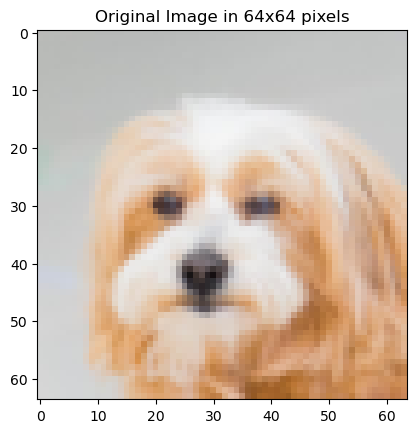

In [16]:
originalImg = np.array(originalImage.resize((64, 64), Image.Resampling.BILINEAR))
# Plot the reshaped original image to 64x64 pixels
plt.figure()
plt.title('Original Image in 64x64 pixels')
plt.imshow(originalImg)
plt.show()

In [17]:
originalImg = originalImg.reshape((4096, 3))
k_list = [1, 50, 250, 500, 1000, 4096]  # list of the number of principal components

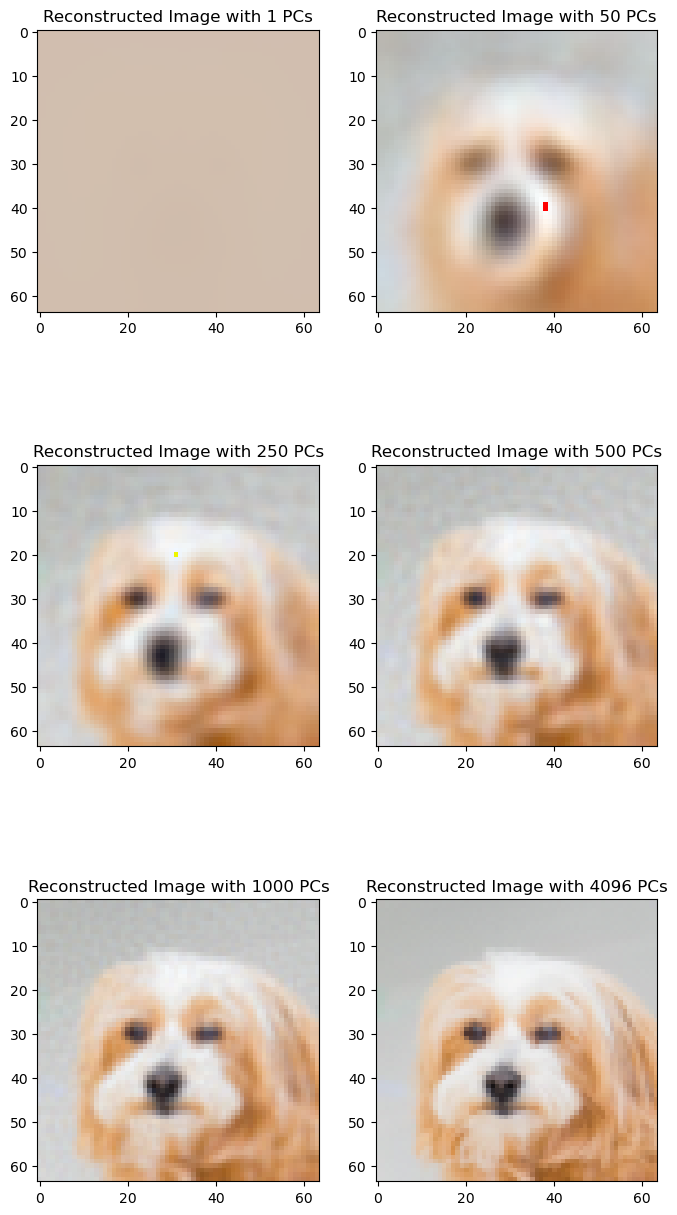

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(8, 16))
r = 0
c = 0
for k in k_list:
    reconstructedImage = perform(k, originalImg)  # find the reconstructed image for k principal component
    axs[r, c].imshow(reconstructedImage.astype('uint8'))
    axs[r, c].title.set_text('Reconstructed Image with ' + str(k) + ' PCs')
    if c == 1:
        c = 0
        r += 1
    else:
        c += 1
plt.show()